# This example shows how we can remove elemnt from BG model


In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import sys
import numpy as np
import sympy as sp
import re

sys.path.append("../core/")
import BondGraph as bg

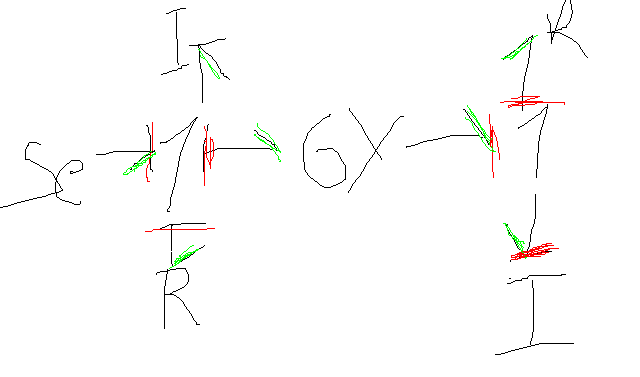

In [2]:
# Create empty model
model = bg.BondGraph(Name ='My Bond graph model of motor')

In [3]:
#Create some elements
GY_1 = bg.BGelement('GY')
SE_1 = bg.BGelement('SE')
R_1 = bg.BGelement('R', Position=[3,4])
R_2 = bg.BGelement('R', Position=[3,4])
I_1 = bg.BGelement('I')
I_2 = bg.BGelement('I')

OneJ_1 = bg.BGelement('1')
OneJ_2 = bg.BGelement('1')


In [4]:
# add a connections between elements in model
model.connect(SE_1, OneJ_1)
model.connect(I_1, OneJ_1)
model.connect(R_1, OneJ_1)
model.connect(GY_1, OneJ_1)
model.connect(GY_1, OneJ_2)
model.connect(OneJ_2, I_2)
model.connect(R_2, OneJ_2)

New BG element detected with ID=1, adding to the model.
New BG element detected with ID=6, adding to the model.
New BG element detected with ID=4, adding to the model.
New BG element detected with ID=2, adding to the model.
New BG element detected with ID=0, adding to the model.
New BG element detected with ID=7, adding to the model.
New BG element detected with ID=5, adding to the model.
New BG element detected with ID=3, adding to the model.


In [5]:
bg.show_ports_state(model)

Element name:  SE_1
++ port_id: 0 |  arrow:  None |  causality:  None
Element name:  1_6
++ port_id: 1 |  arrow:  None |  causality:  None
++ port_id: 3 |  arrow:  None |  causality:  None
++ port_id: 5 |  arrow:  None |  causality:  None
++ port_id: 7 |  arrow:  None |  causality:  None
Element name:  I_4
++ port_id: 2 |  arrow:  None |  causality:  None
Element name:  R_2
++ port_id: 4 |  arrow:  None |  causality:  None
Element name:  GY_0
++ port_id: 6 |  arrow:  None |  causality:  None
++ port_id: 8 |  arrow:  None |  causality:  None
Element name:  1_7
++ port_id: 9 |  arrow:  None |  causality:  None
++ port_id: 10 |  arrow:  None |  causality:  None
++ port_id: 13 |  arrow:  None |  causality:  None
Element name:  I_5
++ port_id: 11 |  arrow:  None |  causality:  None
Element name:  R_3
++ port_id: 12 |  arrow:  None |  causality:  None


In [6]:
model.applyRules()

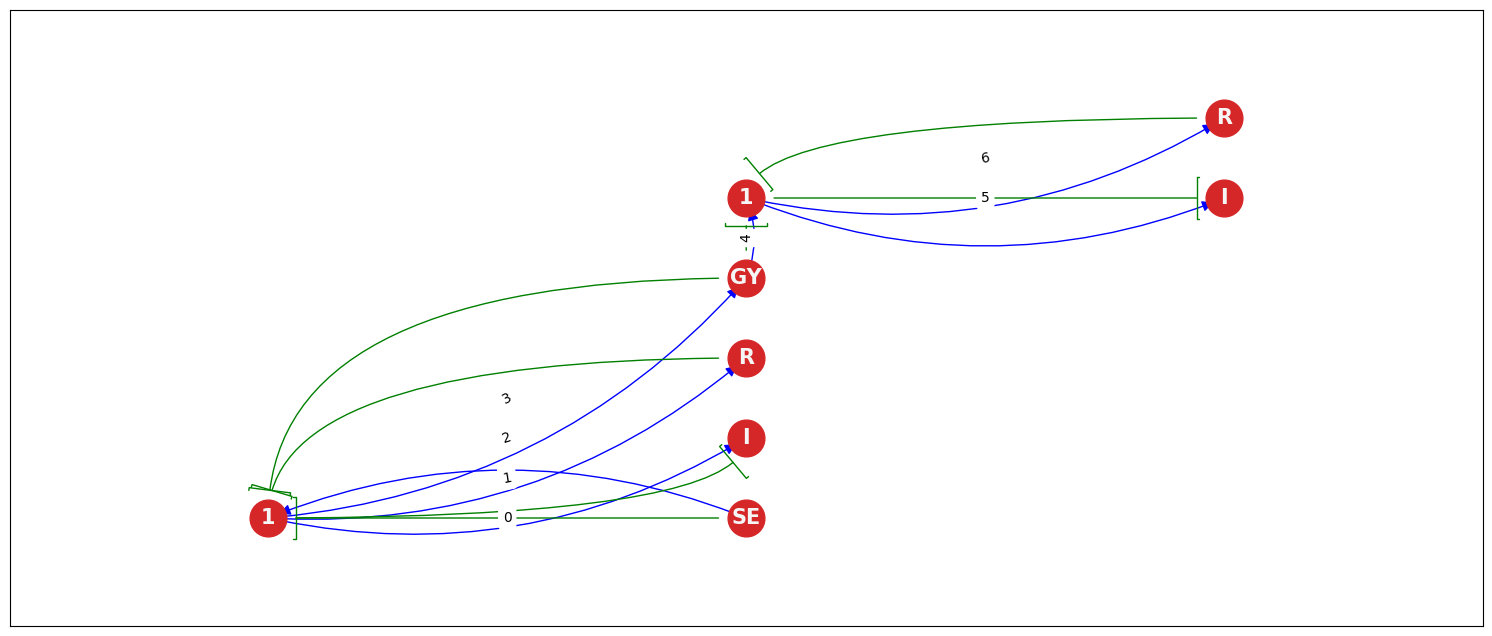

In [7]:
# Set positions automatically for drawing
# some automatically done works on model
model.render()
model.draw()

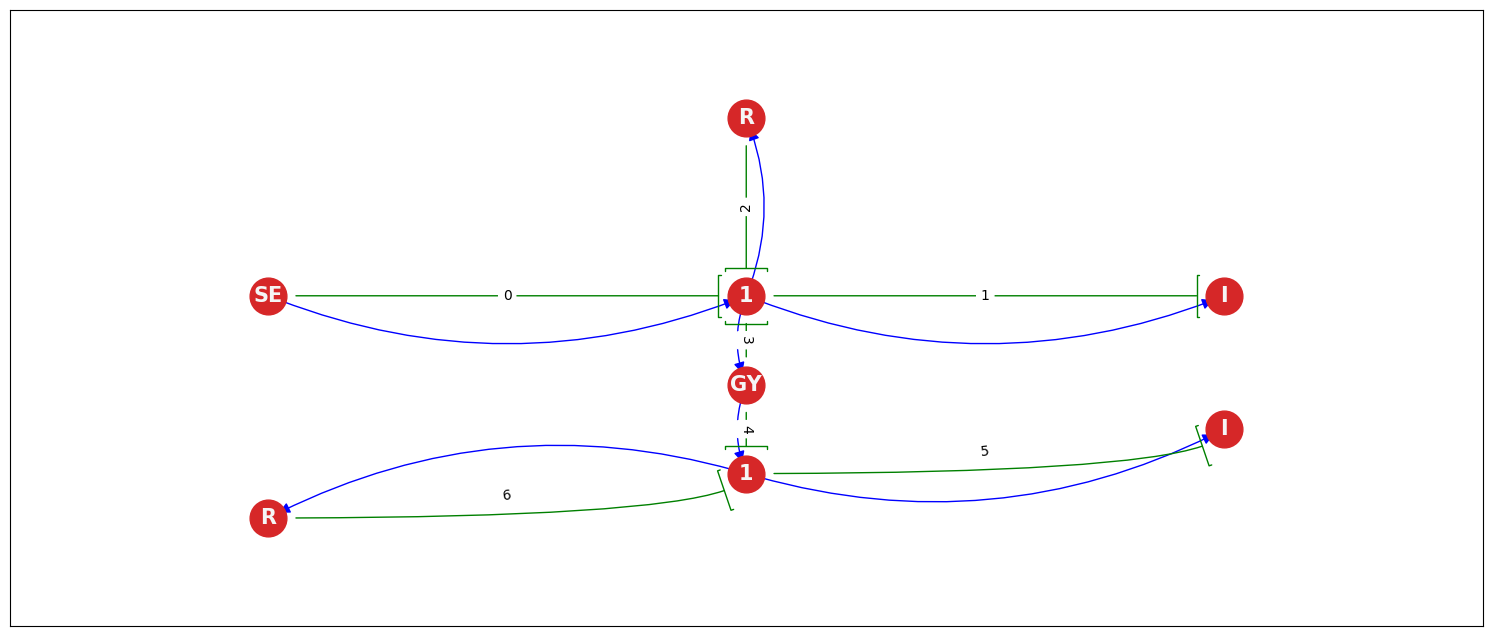

In [8]:
# set positions manually
SE_1.setPosition([1,7])
OneJ_1.setPosition([2,7])
I_1.setPosition([3,7])
R_1.setPosition([2,11])
GY_1.setPosition([2,5])
OneJ_2.setPosition([2,3])

I_2.setPosition([3,4])
R_2.setPosition([1,2])

# draw
model.draw()

In [9]:
model.disconnect(R_2)
# model.disconnect(I_2)
# model.disconnect(OneJ_2)



printing ports
item has pors= [<BondGraph.BGport object at 0x76b3d0bcb090>]
llooking for  BGport::_____:___________________
          :   id: 12
          : Name: None
          : Type: None
          :  Direction: Input
          :  Causality: Uncausal

remove port ids  BGport::_____:___________________
          :   id: 13
          : Name: None
          : Type: None
          :  Direction: Output
          :  Causality: Causal
 BGport::_____:___________________
          :   id: 12
          : Name: None
          : Type: None
          :  Direction: Input
          :  Causality: Uncausal

removing bond id  6
Removed element =  3


True

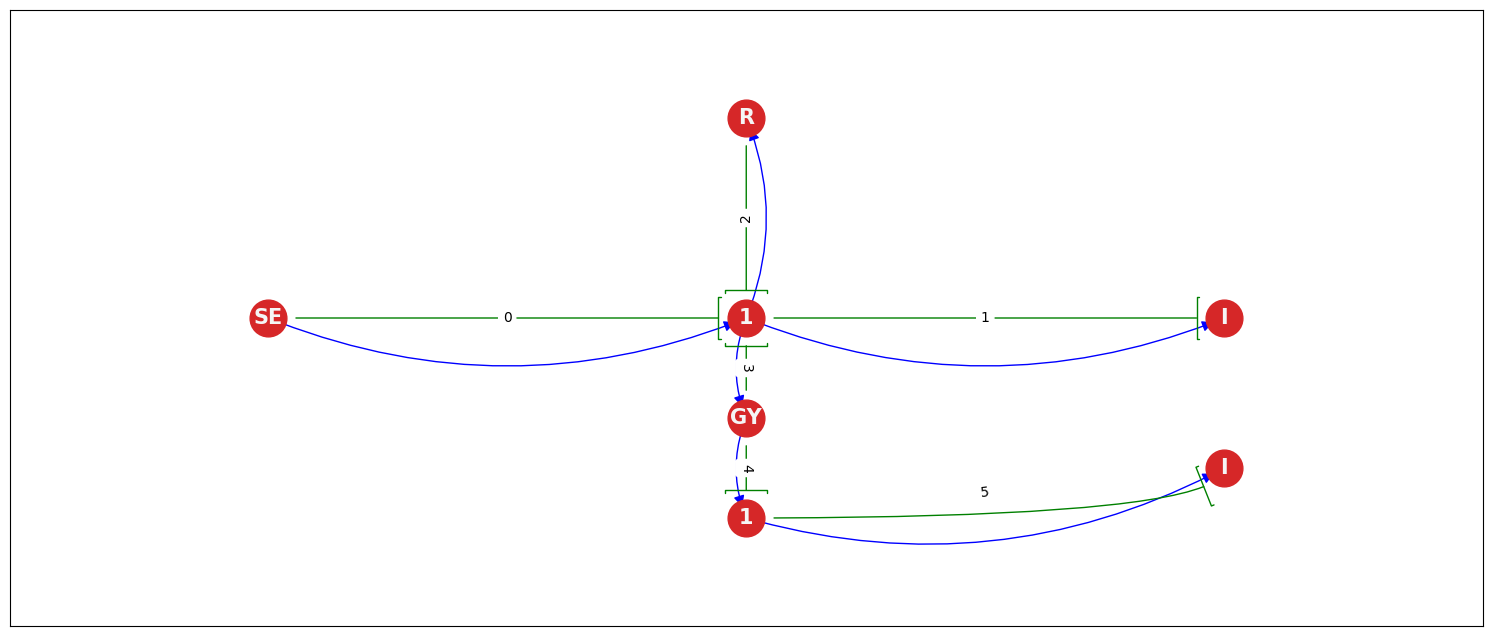

In [10]:
model.verifyRules()

# model.render()
model.draw()

## assign_equations SEQ


In [21]:
model.assign_equations()
equations = model.get_model_equations()


Fr 1 to GY Bond = 3 el1 eff= +e0-e1-e2-e3 el1 flow= +f0=+f1=+f2=+f3 EL2 eff= None el2 flow= None
GY prepared flow +f3*m0
from GY to 1 detected Output Input
Fr GY to 1 conn... Bond iD= 4 elem1 eff= None el1 flow= +f3*m0 elem2 eff= +e4-e5 elem2 fl= +f4=+f5
-+-GY effort=  flow= +f4=+f5
BOND ID= 4
Fr 1 to GY Bond = 10 el1 eff= +e7-e8-e9-e10 el1 flow= +f7=+f8=+f9=+f10 EL2 eff= None el2 flow= None
GY prepared flow +f10*m8
from GY to 1 detected Output Input
Fr GY to 1 conn... Bond iD= 11 elem1 eff= None el1 flow= +f10*m8 elem2 eff= +e11-e12 elem2 fl= +f11=+f12
-+-GY effort=  flow= +f11=+f12
BOND ID= 11
ERROR 007: The bond id: 3  has no effort or flow
ERROR 007: The bond id: 4  has no effort or flow
ERROR 007: The bond id: 10  has no effort or flow
ERROR 007: The bond id: 11  has no effort or flow
Fr 1 to GY Bond = 3 el1 eff= +e0-e1-e2-e3 el1 flow= +f0=+f1=+f2=+f3 EL2 eff= +f4*m0 el2 flow= +f3*m0
from GY to 1 detected Output Input
Fr GY to 1 conn... Bond iD= 4 elem1 eff= +f4*m0 el1 flow= +f3*m

In [22]:
bg.show_bonds_effort_flow(model)

Bond id 0, effort=+e0=+SE1, flow=+f0=+f1=+f2=+f3
Bond id 1, effort=+e1=+e0-e2-e3, flow=+f1=+1/I4*p4
Bond id 2, effort=+e2=+R2*f2, flow=+f0=+f1=+f2=+f3
Bond id 3, effort=+e3=+f4*m0, flow=+f0=+f1=+f2=+f3
Bond id 4, effort=+e4=+f3*m0, flow=+f4=+f5
Bond id 5, effort=+e5=+e4, flow=+f5=+1/I5*p5
Bond id 7, effort=+e7=+SE9, flow=+f7=+f8=+f9=+f10
Bond id 8, effort=+e8=+e7-e9-e10, flow=+f8=+1/I12*p12
Bond id 9, effort=+e9=+R10*f9, flow=+f7=+f8=+f9=+f10
Bond id 10, effort=+e10=+f11*m8, flow=+f7=+f8=+f9=+f10
Bond id 11, effort=+e11=+f10*m8, flow=+f11=+f12
Bond id 12, effort=+e12=+e11, flow=+f12=+1/I13*p13


In [23]:
equations 

['+e0=+SE1',
 '+f0=+f1=+f2=+f3',
 '+e1=+e0-e2-e3',
 '+f1=+1/I4*p4',
 '+e2=+R2*f2',
 '+f0=+f1=+f2=+f3',
 '+e3=+f4*m0',
 '+f0=+f1=+f2=+f3',
 '+e4=+f3*m0',
 '+f4=+f5',
 '+e5=+e4',
 '+f5=+1/I5*p5',
 '+e7=+SE9',
 '+f7=+f8=+f9=+f10',
 '+e8=+e7-e9-e10',
 '+f8=+1/I12*p12',
 '+e9=+R10*f9',
 '+f7=+f8=+f9=+f10',
 '+e10=+f11*m8',
 '+f7=+f8=+f9=+f10',
 '+e11=+f10*m8',
 '+f11=+f12',
 '+e12=+e11',
 '+f12=+1/I13*p13']

## State-space form sequence

In [24]:
cauchy_state_equastions, variables_exp = model.cauchy_form_equastions_sequence()

Fr 1 to GY Bond = 3 el1 eff= +e0-e1-e2-e3 el1 flow= +f0=+f1=+f2=+f3 EL2 eff= +f4*m0 el2 flow= +f3*m0
from GY to 1 detected Output Input
Fr GY to 1 conn... Bond iD= 4 elem1 eff= +f4*m0 el1 flow= +f3*m0 elem2 eff= +e4-e5 elem2 fl= +f4=+f5
-+-GY effort= +e4=+f3*m0 flow= +f4=+f5
BOND ID= 4
Fr 1 to GY Bond = 10 el1 eff= +e7-e8-e9-e10 el1 flow= +f7=+f8=+f9=+f10 EL2 eff= +f11*m8 el2 flow= +f10*m8
from GY to 1 detected Output Input
Fr GY to 1 conn... Bond iD= 11 elem1 eff= +f11*m8 el1 flow= +f10*m8 elem2 eff= +e11-e12 elem2 fl= +f11=+f12
-+-GY effort= +e11=+f10*m8 flow= +f11=+f12
BOND ID= 11
capacitor_variables= {'dp4/dt': e1, 'dp5/dt': e5, 'dp12/dt': e8, 'dp13/dt': e12}
final_vars= [SE1, SE9, p4, p5, p12, p13, I4, R2, m0, I5, I12, R10, m8, I13]
dp4/dt =
variables list = {e1}
substituting... e1 -----b--- e0 - e2 - e3
exp in progress... e0 - e2 - e3
substituting... e2 -----b--- R2*f2
exp in progress... -R2*f2 + e0 - e3
substituting... e0 -----b--- SE1
exp in progress... -R2*f2 + SE1 - e3
substi

In [25]:
model.final_variables

[SE1, SE9, p4, p5, p12, p13, I4, R2, m0, I5, I12, R10, m8, I13]

In [26]:
#just show
print("############## STATE EQUASIONS ############")
for i in cauchy_state_equastions.keys():
    print(i, '=', cauchy_state_equastions[i])
print("####################################################")
print("State variables: ", model.state_variables)

############## STATE EQUASIONS ############
dp4/dt = SE1 - m0*p5/I5 - R2*p4/I4
dp5/dt = m0*p4/I4
dp12/dt = SE9 - m8*p13/I13 - R10*p12/I12
dp13/dt = m8*p12/I12
####################################################
State variables:  [p4, p5, p12, p13]


In [27]:
print('effort-flow list:', model.eff_flows_sp, '\nvariables list:', model.final_variables, '\n inputs:', model.input_variables)

effort-flow list: [f1, e3, e2, f12, e11, e0, e10, e7, f5, f4, f7, e9, e12, f10, f8, e4, e5, f11, e1, f0, f2, f3, f9, e8] 
variables list: [SE1, SE9, p4, p5, p12, p13, I4, R2, m0, I5, I12, R10, m8, I13] 
 inputs: [SE1, SE9]


In [28]:
variables_exp

{f1: [p4/I4],
 e3: [f4*m0],
 e2: [R2*f2],
 f12: [p13/I13],
 e11: [f10*m8],
 e0: [SE1],
 e10: [f11*m8],
 e7: [SE9],
 f5: [p5/I5],
 f4: [f5],
 f7: [f8],
 e9: [R10*f9],
 e12: [e11],
 f10: [f7],
 f8: [p12/I12],
 e4: [f3*m0],
 e5: [e4],
 f11: [f12],
 e1: [e0 - e2 - e3],
 f0: [f1],
 f2: [f0],
 f3: [f0],
 f9: [f7],
 e8: [-e10 + e7 - e9]}

## Make state-space eq in matrix from

In [29]:
model.make_state_statespace(cauchy_state_equastions)
print(f'Matrix A: {model.get_matrix_A()} \n Matrix B: {model.get_matrix_B()}\n input_variables: {model.input_variables} \n state_variables: {model.state_variables}')

Matrix A: Matrix([[-R2/I4, -m0/I5, 0, 0], [m0/I4, 0, 0, 0], [0, 0, -R10/I12, -m8/I13], [0, 0, m8/I12, 0]]) 
 Matrix B: Matrix([[1, 0], [0, 0], [0, 1], [0, 0]])
 input_variables: [SE1, SE9] 
 state_variables: [p4, p5, p12, p13]


In [30]:
model.get_matrix_A()

Matrix([
[-R2/I4, -m0/I5,        0,       0],
[ m0/I4,      0,        0,       0],
[     0,      0, -R10/I12, -m8/I13],
[     0,      0,   m8/I12,       0]])

In [31]:
model.get_matrix_B()

Matrix([
[1, 0],
[0, 0],
[0, 1],
[0, 0]])

## Make С-D-matrix
Now we can set the input variables and get С-В-matrix

In [32]:
output_variables = "e2,f2"
cauchy_form_output_eq = model.cauchy_form_output_eq(variables_exp, output_variables)

Input the names of output variables:
It mast be in list eff_flows:  [f1, e3, e2, f12, e11, e0, e10, e7, f5, f4, f7, e9, e12, f10, f8, e4, e5, f11, e1, f0, f2, f3, f9, e8] (Velocity of Force at some point)
U entered this:  ['e2', 'f2']
output variable=  e2
first match [R2*f2]
next iteration with expression: R2*f0
next iteration with expression: R2*f1
next iteration with expression: R2*p4/I4
output variable=  f2
first match [f0]
next iteration with expression: f1
next iteration with expression: p4/I4


In [23]:
cauchy_form_output_eq

{e2: R2*p4/I4, f2: p4/I4}

In [24]:
model.make_output_statespace(cauchy_form_output_eq)
model.get_matrix_C()

Matrix([
[-R2/I4, -m0/I5],
[ m0/I4,      0]])

In [25]:
model.get_matrix_D()

Matrix([
[1],
[0]])

## Make numerical matrixes from symbolic

In [26]:
print('List of system parameters:', model.parameter_variables)
parameters_values = [5, 2, 1/2, 0.9, 2]


List of system parameters: [I4, R2, m0, I5]


In [27]:
model.input_variables

[SE1]

In [28]:
model.state_variables

[p4, p5]

In [29]:
# we must define initial state
initial_state = np.zeros((len(model.state_variables), 1)) # fill initials by zero
print("initial_state: ", initial_state)
time_steps = 100
sampling_period = 0.5
input_sequence =np.ones((time_steps, len(model.input_variables)))
# print("Input sequence:", input_sequence)
input_sequence[:, 0] = 0


initial_state:  [[0.]
 [0.]]


In [30]:
# set initial state values

initial_state[0] = 0
initial_state[1] = 1

In [31]:

def integrate(output,  initial_state = 0):
    '''
    useful if u wanna inetgrate flow to obtain position.
    '''
    integral = np.zeros(len(output))
    integral[0] = initial_state
    for i in range(1, len(output)):
        integral[i] = integral[i-1] + output[i]
    return integral

In [32]:
print(initial_state.shape, input_sequence.shape, time_steps, sampling_period, parameters_values)

(2, 1) (100, 1) 100 0.5 [5, 2, 0.5, 0.9, 2]


In [33]:
state, output = model.simulate(initial_state, input_sequence, time_steps, sampling_period, parameters_values)    


<class 'numpy.ndarray'> (2, 2) <class 'numpy.ndarray'> (2, 1)


In [34]:
output_pos = integrate(output[1,:-1])


print(f'output size: {output[0,:-1].shape} state size: {initial_state.shape}')

output size: (100,) state size: (2, 1)


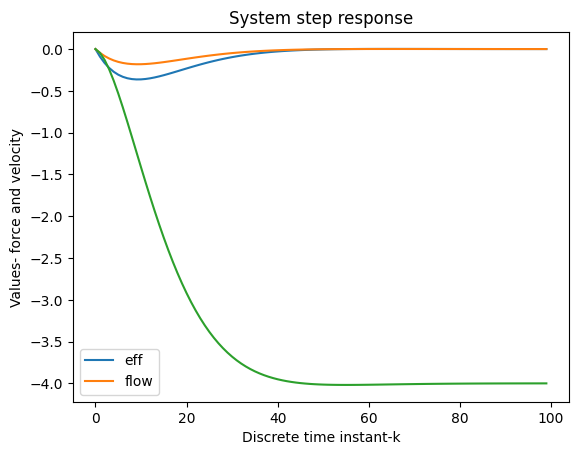

In [35]:
plt.plot(output[0,:-1])
plt.plot(output[1,:-1])

plt.plot(output_pos)

plt.xlabel('Discrete time instant-k')
plt.ylabel('Values- force and velocity')
plt.title('System step response')
plt.legend (('eff', 'flow'))